<h2><a href="https://leetcode.com/problems/minimum-cost-tree-from-leaf-values/">1130. Minimum Cost Tree From Leaf Values</a></h2><h3>Medium</h3><hr><p>Given an array <code>arr</code> of positive integers, consider all binary trees such that:</p>

<ul>
	<li>Each node has either <code>0</code> or <code>2</code> children;</li>
	<li>The values of <code>arr</code> correspond to the values of each <strong>leaf</strong> in an in-order traversal of the tree.</li>
	<li>The value of each non-leaf node is equal to the product of the largest leaf value in its left and right subtree, respectively.</li>
</ul>

<p>Among all possible binary trees considered, return <em>the smallest possible sum of the values of each non-leaf node</em>. It is guaranteed this sum fits into a <strong>32-bit</strong> integer.</p>

<p>A node is a <strong>leaf</strong> if and only if it has zero children.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/08/10/tree1.jpg" style="width: 500px; height: 169px;" />
<pre>
<strong>Input:</strong> arr = [6,2,4]
<strong>Output:</strong> 32
<strong>Explanation:</strong> There are two possible trees shown.
The first has a non-leaf node sum 36, and the second has non-leaf node sum 32.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/08/10/tree2.jpg" style="width: 224px; height: 145px;" />
<pre>
<strong>Input:</strong> arr = [4,11]
<strong>Output:</strong> 44
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>2 &lt;= arr.length &lt;= 40</code></li>
	<li><code>1 &lt;= arr[i] &lt;= 15</code></li>
	<li>It is guaranteed that the answer fits into a <strong>32-bit</strong> signed integer (i.e., it is less than 2<sup>31</sup>).</li>
</ul>


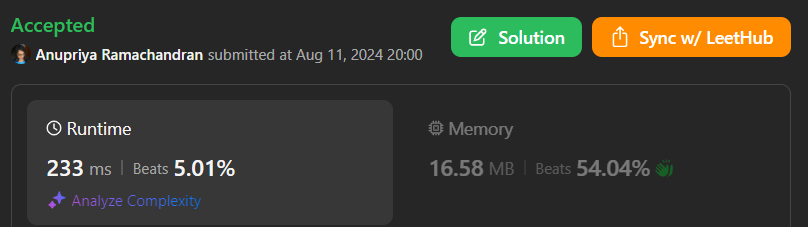

In [8]:
from typing import List
from visualiser.visualiser import Visualiser as vs


class Solution:
    @vs()
    def mctFromLeafValues(self, arr: List[int]) -> int:
        dp = {}
        output = self.helper(arr, 0, len(arr) - 1, dp)
        print(dp)
        return output

    def helper(self, arr, l, r, dp):
        if (l, r) in dp:
            return dp[(l, r)]

        if l >= r:
            return 0

        res = float("inf")

        for k in range(l, r):
            rootVal = max(arr[l : k + 1]) * max(arr[k + 1 : r + 1])
            print(f"rootVal: {rootVal}    arr[l:k+1] : {arr[l : k + 1]}, arr[k, r] : {arr[k + 1 : r + 1]}")
            res = min(
                res,
                rootVal + self.helper(arr, l, k, dp) + self.helper(arr, k + 1, r, dp),
            )
            print(f"res : {res}")

        dp[(l, r)] = res

        return dp[(l, r)]

In [9]:
def main():
    arr = [7, 6, 4, 3, 2 , 5]
    sol = Solution()
    print(sol.mctFromLeafValues(arr))
    vs.make_animation("mctFromLeaveValues.gif", delay =2)
    

if __name__ == "__main__":
    main()

rootVal: 42    arr[l:k+1] : [7], arr[k, r] : [6, 4, 3, 2, 5]
rootVal: 30    arr[l:k+1] : [6], arr[k, r] : [4, 3, 2, 5]
rootVal: 20    arr[l:k+1] : [4], arr[k, r] : [3, 2, 5]
rootVal: 15    arr[l:k+1] : [3], arr[k, r] : [2, 5]
rootVal: 10    arr[l:k+1] : [2], arr[k, r] : [5]
res : 10
res : 25
rootVal: 15    arr[l:k+1] : [3, 2], arr[k, r] : [5]
rootVal: 6    arr[l:k+1] : [3], arr[k, r] : [2]
res : 6
res : 21
res : 41
rootVal: 20    arr[l:k+1] : [4, 3], arr[k, r] : [2, 5]
rootVal: 12    arr[l:k+1] : [4], arr[k, r] : [3]
res : 12
res : 41
rootVal: 20    arr[l:k+1] : [4, 3, 2], arr[k, r] : [5]
rootVal: 12    arr[l:k+1] : [4], arr[k, r] : [3, 2]
res : 18
rootVal: 8    arr[l:k+1] : [4, 3], arr[k, r] : [2]
res : 18
res : 38
res : 68
rootVal: 30    arr[l:k+1] : [6, 4], arr[k, r] : [3, 2, 5]
rootVal: 24    arr[l:k+1] : [6], arr[k, r] : [4]
res : 24
res : 68
rootVal: 30    arr[l:k+1] : [6, 4, 3], arr[k, r] : [2, 5]
rootVal: 24    arr[l:k+1] : [6], arr[k, r] : [4, 3]
res : 36
rootVal: 18    arr[l:

In [9]:
!pip install recursion-visualiser

DEPRECATION: Loading egg at c:\users\a.m.ramachandran\llm_env\lib\site-packages\jobpackages-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Bottom UP

In [10]:
class Solution:
    def mctFromLeafValues(self, arr: List[int]) -> int:
        n = len(arr)
        dp = [[float("inf") for _ in range(n )]for _ in range(n)]
        for i in range(n):
            dp[i][i] = 0

        for l in range(2, n + 1):
            for i in range(n -l + 1):  # low-high range
                j = i + l - 1
                for k in range(i, j):
                    rootVal = max(arr[i:k+ 1]) * max(arr[k + 1: j + 1])
                    dp[i][j] = min(dp[i][j], rootVal + dp[i][k] + dp[k+1][j])

        return dp[0][n - 1] 
